## Ceneo Analyzer

## Imports

In [93]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected

In [94]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

108290707


## Enter code of product about which opinions are to be analyzed

In [95]:
product_id = input('Enter product code:')

## Reading opinions from Json file to pandas.DataFrame


In [96]:
MAX_SCORE = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.stars = opinions.stars.apply(lambda s: round(s*MAX_SCORE,1))

## Basic statistics

In [97]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_scorer = opinions.stars.mean().round(3)
average_scorer


4.196

## Basics chart


# Opinions score histogram

[Text(0, 0, '0.5'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.5'),
 Text(3, 0, '2.0'),
 Text(4, 0, '2.5'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.5'),
 Text(7, 0, '4.0'),
 Text(8, 0, '4.5'),
 Text(9, 0, '5.0')]

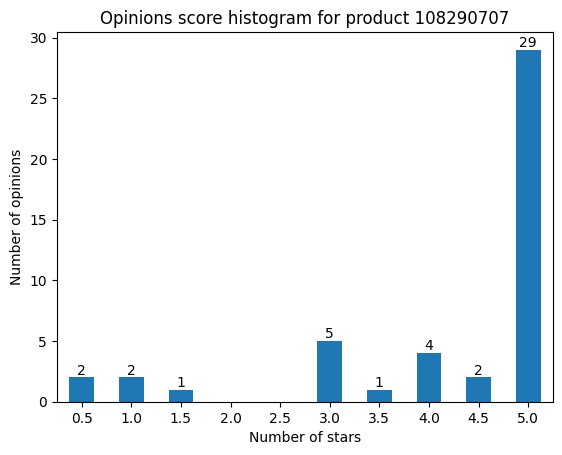

In [98]:
score_distribution = opinions.stars.value_counts().reindex(np.arange(0.5,5.5,0.5))
fig, ax= plt.subplots()
score_distribution.plot.bar()
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l>0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number of opinions")
ax.set_title(f"Opinions score histogram for product {product_id}")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

### Opinions recommendations share

Text(0.5, 1.0, 'Opinions recommendations share foor product 108290707')

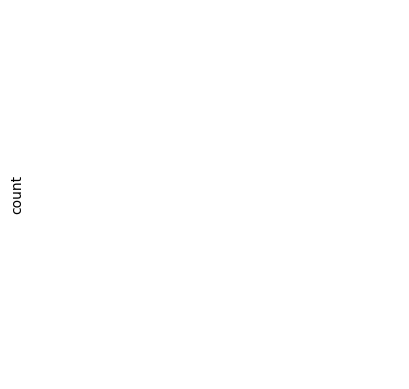

In [99]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
fig, ax=plt.subplots()
recommendation_distribution.plot.pie(
    autopct= "%1.1f%%",
    labels = ['Recommend', "Indifferent", 'Not recommend']
    colors = ['darkgreen', 'cornflowerblue' 'crimson'],
    label =''
)
ax.set_title(f"Opinions recommendations share for product {product_id}")

In [100]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,17349010,KamilZ1,NaN,5.0,The casing resembling a small printer houses a...,"[compact, relatively cheap, efficiency]",[],0,0,2023-03-31 23:03:01,2021-08-05 17:01:22
1,15226686,Paulina,NaN,4.0,"The printer is tiny, but it works like crazy.\...","[wireless communication, price, compact, low p...","[some plastics, e.g. drawer and support]",5,1,2021-11-18 17:43:06,2021-10-18 18:23:50
2,15320141,a...a,NaN,5.0,The printer is small and neat. The installatio...,[],[],4,1,2021-12-07 16:23:55,2021-11-30 14:23:30
3,15010317,r...i,NaN,5.0,Super small equipment. A bit of fiddling with ...,"[wireless communication, price, retractable pa...",[],1,1,2021-09-29 10:51:02,2021-09-21 14:59:04
4,15674997,a...a,NaN,5.0,"Small, great for printing. It fits perfectly o...","[quality of prints, relatively cheap, print sp...",[],0,0,2022-02-08 23:07:29,2022-01-25 22:30:42
5,17309351,e...6,NaN,4.0,"Very cool and tiny equipment. Prints, scans an...","[quality of prints, relatively cheap, print sp...",[],0,0,2023-03-23 14:02:19,2022-08-10 21:15:43
6,16275852,k...0,NaN,5.0,"It takes up little space, is pretty and fulfil...","[quality of prints, relatively cheap, print sp...",[],0,0,2022-07-02 17:26:08,2022-06-01 19:46:06
7,15827529,a...5,NaN,5.0,"It takes up little space, is aesthetically mad...",[],[],0,0,2022-03-16 07:33:16,2022-02-11 22:40:51
8,18252442,j...n,NaN,4.0,"I had difficulty starting it, very poor instru...",[],[],0,0,2023-12-28 12:22:47,2023-12-07 17:00:32
9,16105334,arek,NaN,5.0,"Hello, this is a great firecracker printer for...",[],[],0,0,2022-05-19 19:51:46,2022-05-12 12:51:02
